# Question 2
2)

In [1]:
data(mtcars)
str(mtcars)
summary(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




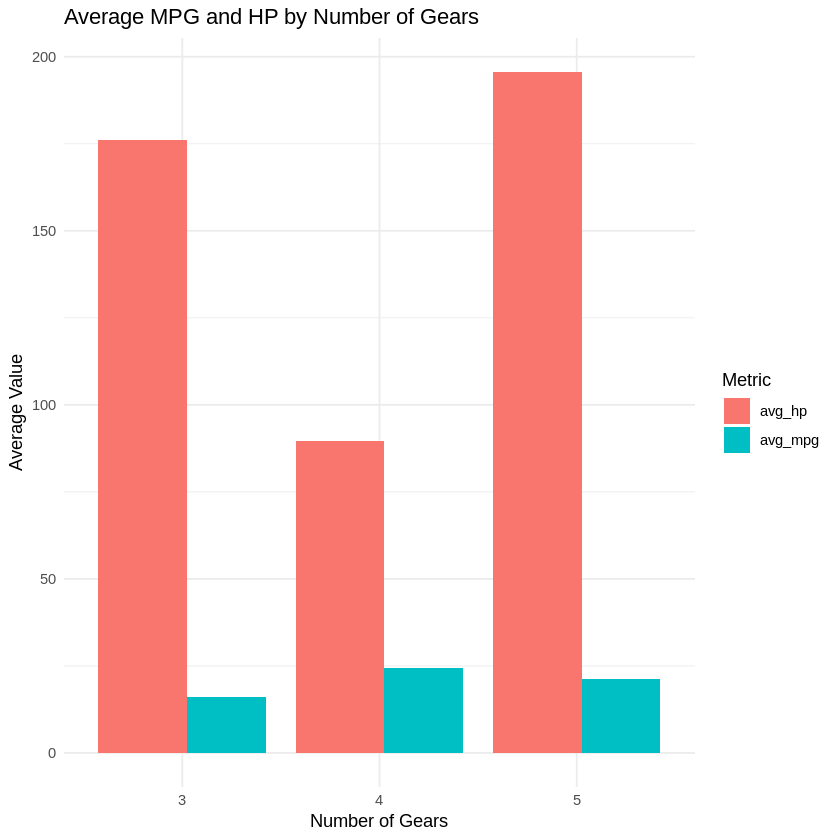

In [2]:
# Load required library
library(ggplot2)
library(dplyr)

# Group by gear and calculate average mpg and hp
mtcars_grouped <- mtcars %>%
  group_by(gear) %>%
  summarise(avg_mpg = mean(mpg), avg_hp = mean(hp))

# Reshape data for plotting
mtcars_long <- tidyr::pivot_longer(mtcars_grouped,
                                   cols = c(avg_mpg, avg_hp),
                                   names_to = "metric",
                                   values_to = "value")

# Create grouped bar plot
ggplot(mtcars_long, aes(x = factor(gear), y = value, fill = metric)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  labs(title = "Average MPG and HP by Number of Gears",
       x = "Number of Gears",
       y = "Average Value",
       fill = "Metric") +
  theme_minimal()

# Question 2
3)

In [8]:
# Load necessary libraries
install.packages("caret")
install.packages("randomForest")
library(caret)
library(randomForest)

# Set random seed for reproducibility
set.seed(123)

# Split the data into training and testing sets (80% train, 20% test)
train_index <- createDataPartition(mtcars$mpg, p = 0.8, list = FALSE)
train_data <- mtcars[train_index, ]
test_data <- mtcars[-train_index, ]

# Separate features (X) and target variable (y) for training and testing sets
train_x <- train_data[, -which(names(train_data) == "mpg")]
train_y <- train_data$mpg
test_x <- test_data[, -which(names(test_data) == "mpg")]
test_y <- test_data$mpg

# Scale the numerical features using preProcess
# This is important for many machine learning algorithms, though less critical for Random Forest
# We will fit the scaler on the training data and apply it to both training and testing data
preproc_param <- preProcess(train_x, method = c("center", "scale"))
train_x_scaled <- predict(preproc_param, train_x)
test_x_scaled <- predict(preproc_param, test_x)

# Combine scaled features and target variable back into data frames for training and testing
train_scaled <- cbind(train_x_scaled, mpg = train_y)
test_scaled <- cbind(test_x_scaled, mpg = test_y)


# Train a Random Forest model to predict mpg
# The formula specifies mpg as the target and all other columns as predictors
# ntree specifies the number of trees in the forest
# mtry specifies the number of variables randomly sampled at each split
rf_model <- randomForest(mpg ~ ., data = train_scaled, ntree = 500, mtry = floor(ncol(train_scaled)/3))

# Make predictions on the scaled test data
predictions <- predict(rf_model, test_scaled)

# Evaluate the model performance

# Calculate Root Mean Squared Error (RMSE)
# RMSE measures the standard deviation of the residuals (prediction errors)
rmse <- sqrt(mean((test_scaled$mpg - predictions)^2))
cat("RMSE:", rmse, "\n")

# Calculate R-squared
# R-squared represents the proportion of the variance for a dependent variable that's explained by the independent variables in a regression model.
# It ranges from 0 to 1, where 1 indicates a perfect fit.
sse <- sum((test_scaled$mpg - predictions)^2) # Sum of squared errors
sst <- sum((test_scaled$mpg - mean(test_scaled$mpg))^2) # Total sum of squares
r_squared <- 1 - (sse / sst)
cat("R-squared:", r_squared, "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




RMSE: 2.482045 
R-squared: 0.8965005 
